In [204]:
## Downlaod Data From Kaggle
# link = "https://www.kaggle.com/c/digit-recognizer/data"

In [174]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

%matplotlib inline
plt.style.use("ggplot")

In [175]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [176]:
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [177]:
print(df_train.shape)
print(df_test.shape)

(42000, 785)
(28000, 784)


C:\Users\raada\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


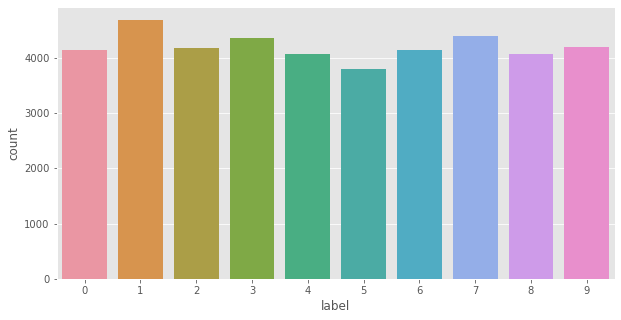

In [178]:
plt.figure(figsize=(10,5))
sns.countplot(df_train["label"])
plt.show()

In [179]:
X = df_train.iloc[:,1:]
y = df_train.iloc[:,:1]

In [180]:
print(X.shape)
print(y.shape)

(42000, 784)
(42000, 1)


In [181]:
X = X / 255.0
df_test = df_test / 255.0

In [182]:
X.head(2)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [183]:
## Reshape The Data
X = X.values.reshape(-1,28,28,1)
df_test = df_test.values.reshape(-1,28,28,1)

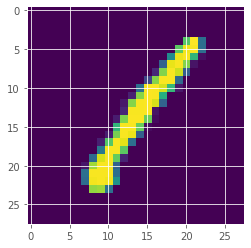

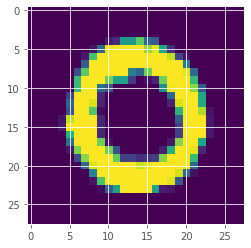

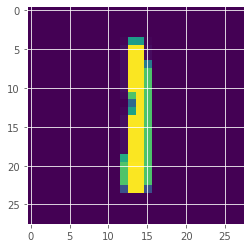

In [184]:
## plot some images
for i in range(3):
    plt.imshow(X[i])
    plt.show()

In [185]:
y.head()

,label
0,1
1,0
2,1
3,4
4,0


In [186]:
y = keras.utils.to_categorical(y,num_classes=10)
y

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [187]:
## Split The Data into X_train, X_test, y_train, y_test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)

In [188]:
print(f"X_train.shape : {X_train.shape}")
print(f"X_test.shape : {X_test.shape}")
print(f"y_train.shape : {y_train.shape}")
print(f"y_test.shape : {y_test.shape}")

X_train.shape : (37800, 28, 28, 1)
X_test.shape : (4200, 28, 28, 1)
y_train.shape : (37800, 10)
y_test.shape : (4200, 10)


## Define The Model

In [189]:
model = keras.Sequential([
    keras.layers.Conv2D(32,(3,3),input_shape=(28,28,1)),
    keras.layers.MaxPooling2D(2,2),
    
    keras.layers.Conv2D(64,(3,3),activation="relu"),
    keras.layers.MaxPooling2D(2,2),
    
    keras.layers.Conv2D(64,(3,3),activation="relu"),
    keras.layers.MaxPooling2D(2,2),
    
    keras.layers.Dropout(0.25),
    
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10,activation="softmax")
])

In [190]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [191]:
best_model = keras.callbacks.ModelCheckpoint("best_model.h5",save_best_only=True)
history = model.fit(X_train,y_train,epochs=100,verbose=1,validation_data=(X_test,y_test),callbacks=[best_model])

Train on 37800 samples, validate on 4200 samples
Epoch 1/100
37800/37800 [==============================] - 14s 371us/sample - loss: 0.4648 - accuracy: 0.8547 - val_loss: 0.0993 - val_accuracy: 0.9714
Epoch 2/100
37800/37800 [==============================] - 14s 361us/sample - loss: 0.1646 - accuracy: 0.9540 - val_loss: 0.0807 - val_accuracy: 0.9762
Epoch 3/100
37800/37800 [==============================] - 14s 358us/sample - loss: 0.1286 - accuracy: 0.9634 - val_loss: 0.0675 - val_accuracy: 0.9833
Epoch 4/100
37800/37800 [==============================] - 14s 361us/sample - loss: 0.1019 - accuracy: 0.9708 - val_loss: 0.0506 - val_accuracy: 0.9876
Epoch 5/100
37800/37800 [==============================] - 14s 361us/sample - loss: 0.0892 - accuracy: 0.9741 - val_loss: 0.0688 - val_accuracy: 0.9814
Epoch 6/100
37800/37800 [==============================] - 17s 457us/sample - loss: 0.0810 - accuracy: 0.9763 - val_loss: 0.0519 - val_accuracy: 0.9852
Epoch 7/100
37800/37800 [==============

37800/37800 [==============================] - 14s 377us/sample - loss: 0.0190 - accuracy: 0.9942 - val_loss: 0.1009 - val_accuracy: 0.9879
Epoch 55/100
37800/37800 [==============================] - 14s 379us/sample - loss: 0.0219 - accuracy: 0.9944 - val_loss: 0.0924 - val_accuracy: 0.9860
Epoch 56/100
37800/37800 [==============================] - 15s 385us/sample - loss: 0.0197 - accuracy: 0.9942 - val_loss: 0.0718 - val_accuracy: 0.9871
Epoch 57/100
37800/37800 [==============================] - 14s 379us/sample - loss: 0.0187 - accuracy: 0.9950 - val_loss: 0.0803 - val_accuracy: 0.9874
Epoch 58/100
37800/37800 [==============================] - 14s 379us/sample - loss: 0.0222 - accuracy: 0.9939 - val_loss: 0.0867 - val_accuracy: 0.9867
Epoch 59/100
37800/37800 [==============================] - 14s 379us/sample - loss: 0.0193 - accuracy: 0.9951 - val_loss: 0.0884 - val_accuracy: 0.9862
Epoch 60/100
37800/37800 [==============================] - 14s 380us/sample - loss: 0.0211 - a

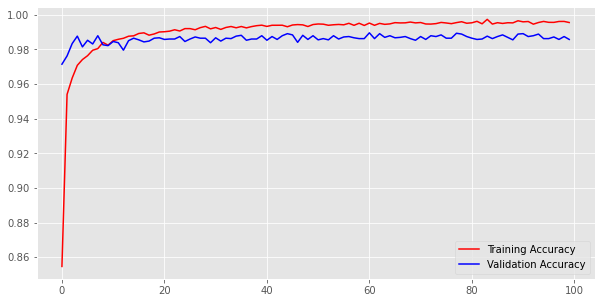

<Figure size 432x288 with 0 Axes>

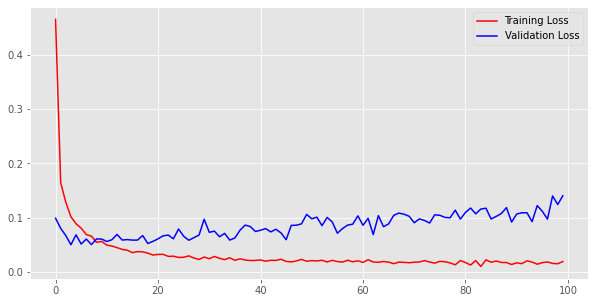

In [192]:
plt.figure(figsize=(10,5))

acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(len(acc))

plt.plot(epochs,acc,"r",label="Training Accuracy")
plt.plot(epochs,val_acc,"b",label="Validation Accuracy")

plt.legend()
plt.figure()

plt.figure(figsize=(10,5))

plt.plot(epochs,loss,"r",label="Training Loss")
plt.plot(epochs,val_loss,"b",label="Validation Loss")

plt.legend()
plt.show()

In [193]:
new_model = keras.models.load_model("best_model.h5")
new_model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 1, 1, 64)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 1, 1, 64)         

In [194]:
y_pred = new_model.predict(X_test)

In [195]:
y_predictions = [np.argmax(x) for x in y_pred]

9


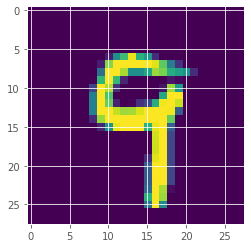

1


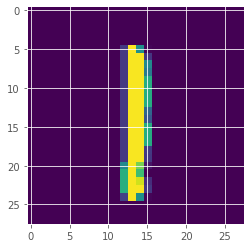

3


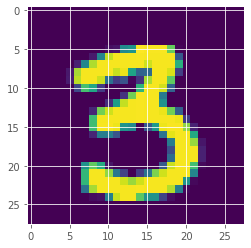

7


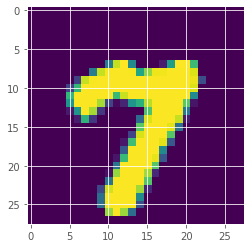

7


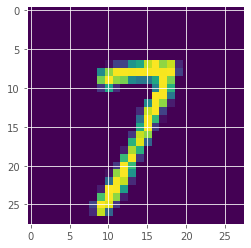

9


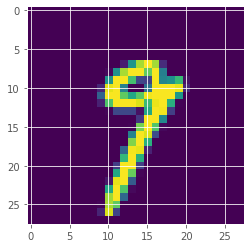

8


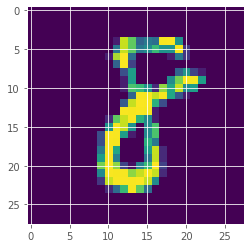

2


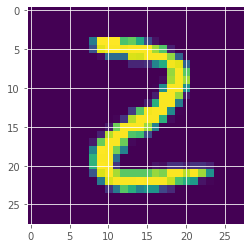

1


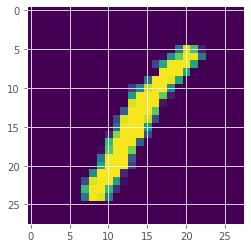

7


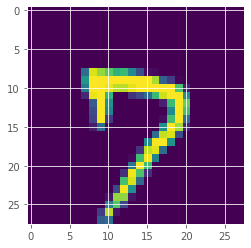

In [196]:
for i in range(10):
    print(y_predictions[i])
    plt.imshow(X_test[i])
    plt.show()

In [197]:
## Predict the df_test data for submission

In [198]:
y_label = new_model.predict(df_test)

In [199]:
y_labels = [np.argmax(x) for x in y_label]

In [200]:
y_labels[:20]

[2, 0, 9, 9, 3, 7, 0, 3, 0, 3, 5, 7, 4, 0, 4, 3, 3, 1, 9, 0]

In [201]:
sub_test = pd.DataFrame({
    "ImageId":range(1,len(y_labels)+1),
    "Label":y_labels
})

In [202]:
sub_test.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [203]:
sub_test.to_csv("sub_test.csv",index=False)